In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)), #make any image 28x28 
                               transforms.ToTensor(),       #make a tensor
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)


An update to the code which applies to the MNIST section of this. When normalizing the images, make sure to write transforms.Normalize((0.5,), (0.5,))  , rather than what  had earlier, transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) . Ultimately, this is done to ensure a single channel of (1, 28, 28), rather than (3, 28, 28). the 3 was for colour.

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  #print(image.shape)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

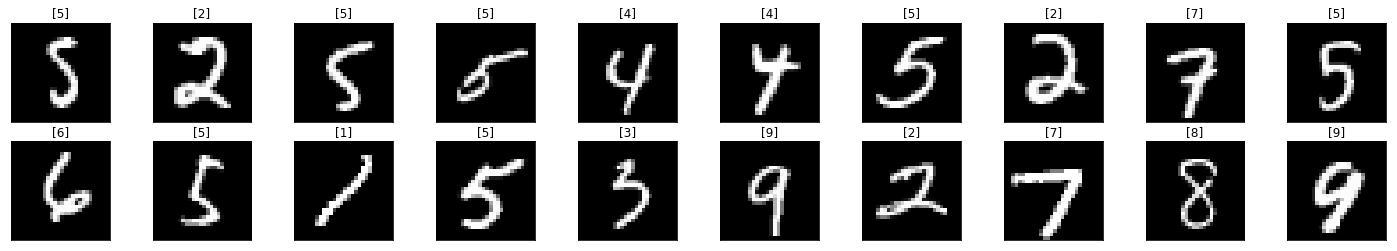

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

Neural Network


In [0]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, H3, D_out):                     #
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear2 = nn.Linear(H2, H3)
        self.linear3 = nn.Linear(H3, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [6]:
#model = Classifier(784, 125, 65, 10 )    # number of pixels in image , nodes in first layer , second layer, classes to put 

model = Classifier(784, 33, 33, 33, 10 )    # number of pixels in image , nodes in first layer , second layer, third layer, classes to put 
#model = Classifier(784, 50, 50, 10 )    # number of pixels in image , nodes in first layer , second layer, classes to put 
#model = Classifier(784, 100, 10 )
model

Classifier(
  (linear1): Linear(in_features=784, out_features=33, bias=True)
  (linear2): Linear(in_features=33, out_features=33, bias=True)
  (linear3): Linear(in_features=33, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [8]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0],-1) # 1,28,28   ---> 1, 784                                      
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad(): #this is to save memory by settng all grads flags to false for this segment 
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 1.4022, acc 61.2800 
validation loss: 0.7032, validation acc 82.6800 
epoch : 2
training loss: 0.5596, acc 85.4633 
validation loss: 0.4415, validation acc 88.1300 
epoch : 3
training loss: 0.4183, acc 88.5750 
validation loss: 0.3736, validation acc 89.5900 
epoch : 4
training loss: 0.3685, acc 89.6300 
validation loss: 0.3381, validation acc 90.0400 
epoch : 5
training loss: 0.3419, acc 90.3267 
validation loss: 0.3149, validation acc 90.7900 
epoch : 6
training loss: 0.3240, acc 90.7900 
validation loss: 0.3023, validation acc 91.2000 
epoch : 7
training loss: 0.3088, acc 91.1100 
validation loss: 0.2878, validation acc 91.3600 
epoch : 8
training loss: 0.2964, acc 91.4350 
validation loss: 0.2782, validation acc 91.8600 
epoch : 9
training loss: 0.2852, acc 91.7517 
validation loss: 0.2666, validation acc 92.3100 
epoch : 10
training loss: 0.2744, acc 92.0650 
validation loss: 0.2577, validation acc 92.4600 
epoch : 11
training loss: 0.2652, acc 92.3717 
va

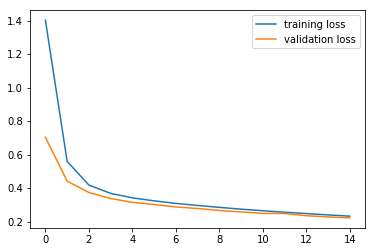

In [9]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

looks like it is right around 13 where it shows about right validation error starts to go further and separate from the training and is the balance where it needs to fit. 

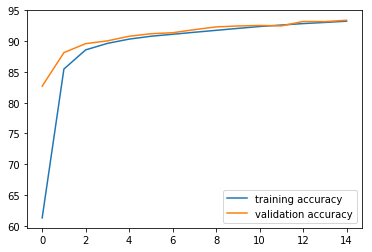

In [10]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

the training loss and validation loss begin to approach eachother the training loss begins to be less then the validation loss and that is where it begins to over fit. 

In [11]:
!pip3 install pillow==4.0.0

In [0]:
import PIL.ImageOps

<Response [200]>


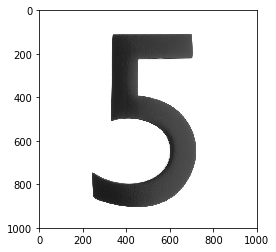

In [13]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
print(response)  #Response [200] successful

img = Image.open(response.raw)
plt.imshow(img)


preprocess from 1000x1000 to 28x28
and black number w/ white background to white number with black background

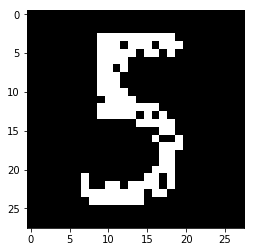

In [14]:
img = PIL.ImageOps.invert(img)  # invert colours
img = img.convert('1') # from RGB to black&white
img = transform(img) # transform image from 2nd cell

              
plt.imshow(im_convert(img))

In [15]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)


print (pred.item())

5


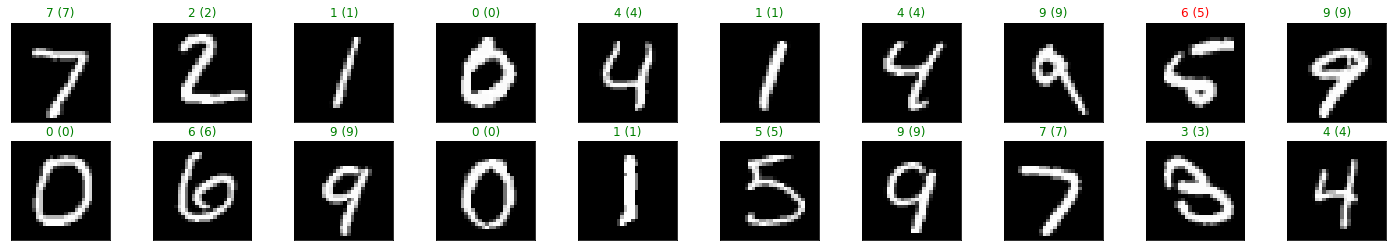

In [16]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), 
                                str(labels[idx].item())), 
               color=("green" if preds[idx]==labels[idx] else "red"))
